# Preprocessing

## Reading CSV

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [52]:
data = pd.read_csv('../sample_output_WAY_larger.csv')

## Understanding Dataset

In [53]:
data.shape

(20000, 18)

In [54]:
data.head(3)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,http://sub22b.jelastic.regruhosting.ru/acesso/...,Phishing.Database,phishing,62,False,4.203093,False,0.039216,4,0,0,0,False,2,0.606254,False,NaN,NaN
1,https://cherry-609d.hakeem1115.workers.dev/63f...,Phishing.Database,phishing,79,False,4.747960,False,0.634146,3,0,5,0,False,2,0.438186,False,"{'domain_name': None, 'registrar': None, 'whoi...",NaN
2,http://secureid-auth5b.serveirc.com/navyfedera...,Phishing.Database,phishing,62,False,4.453623,False,0.040000,4,0,1,1,False,1,0.606254,True,"{'domain_name': 'SERVEIRC.COM', 'registrar': '...",8804.0


In [55]:
data.tail(3)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
19997,lokrum.hr,Majestic,legitimate,9,False,2.947703,False,0.000000,1,0,0,0,False,0,0.352214,False,"{'domain_name': 'lokrum.hr', 'whois_server': '...",8232.0
19998,mot-itcdb2019.minotstateu.edu,Cisco-Umbrella,legitimate,29,False,3.974890,False,0.181818,2,0,1,0,False,1,0.266068,False,"{'domain_name': 'MINOTSTATEU.EDU', 'creation_d...",9047.0
19999,www.edmundoptics.co.uk,Cisco-Umbrella,legitimate,22,False,3.663533,False,0.000000,3,0,0,0,False,1,0.391973,False,"{'domain_name': 'edmundoptics.co.uk', 'registr...",8581.0


In [56]:
data.dtypes

url                    object
source                 object
label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
whois_data             object
domain_age_days       float64
dtype: object

## Dropping variables

Dropping variables that are not IV

In [57]:
# The url is unnecessary as all the informations about the url are in the followings variables
# whois_data is unnecessary as its content is summarized in the other IV variables
# domain_age_data is unnecessary has it won't help the model to determine the TV

data = data.drop(['url', 'whois_data', 'domain_age_days'], axis=1) # axis=1 necessary ?


Dropping datas totally definning the model

In [58]:
# The source colums determines whether the url is legitimate or not
data = data.drop('source', axis=1)


In [59]:
data.shape
# loss of 4 col

(20000, 14)

## Understanding clean dataset

In [60]:
data.isnull().sum()

label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
dtype: int64

In [61]:
data.dtypes

label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
dtype: object

In [62]:
data.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,45.932750,3.910687,0.114772,2.199600,0.011850,0.750250,0.038200,0.782000,0.465099
std,66.937924,0.636484,0.243596,2.223602,0.167066,1.707138,0.346333,1.078904,0.187741
min,5.000000,1.657743,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.071456
25%,17.000000,3.452820,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.306397
50%,29.000000,3.915870,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.415452
75%,52.000000,4.329118,0.130011,3.000000,0.000000,1.000000,0.000000,1.000000,0.618162
max,2631.000000,5.963848,5.500000,148.000000,16.000000,113.000000,15.000000,27.000000,1.429613


We see that the variable 'url_length' is probably neither standardized nor normalized. Below is therefore the distribution of the values.

[]

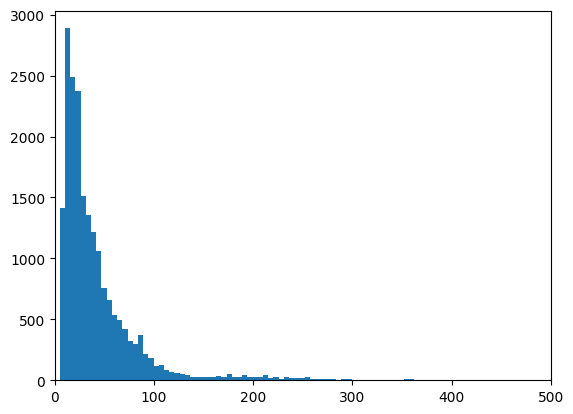

In [63]:
# See distribution of 'url length'

plt.hist(data['url_length'], bins=500)
plt.xlim(0, 500) #optional
plt.plot()

Indeed, the distribution of the variable 'url_lenght' does folow a Gaussian. A standardization can be performed.

## Standardization & Normalization

In [64]:
# Standardization of the url_lenght
from sklearn.preprocessing import StandardScaler

#temp = preprocessing.normalize([data['url_length']])
data['url_length'] = StandardScaler().fit_transform(data[['url_length']])
data['dot_count'] = StandardScaler().fit_transform(data[['dot_count']])
data['dash_count'] = StandardScaler().fit_transform(data[['dash_count']])


data.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy
count,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,4.547474e-17,3.910687,0.114772,-8.526513e-17,0.011850,1.136868e-17,0.038200,0.782000,0.465099
std,1.000025e+00,0.636484,0.243596,1.000025e+00,0.167066,1.000025e+00,0.346333,1.078904,0.187741
min,-6.115184e-01,1.657743,0.000000,-5.394985e-01,0.000000,-4.394892e-01,0.000000,0.000000,0.071456
25%,-4.322434e-01,3.452820,0.000000,-5.394985e-01,0.000000,-4.394892e-01,0.000000,0.000000,0.306397
50%,-2.529683e-01,3.915870,0.000000,-8.976650e-02,0.000000,-4.394892e-01,0.000000,1.000000,0.415452
75%,9.064221e-02,4.329118,0.130011,3.599655e-01,0.000000,1.463011e-01,0.000000,1.000000,0.618162
max,3.861984e+01,5.963848,5.500000,6.557110e+01,16.000000,6.575482e+01,15.000000,27.000000,1.429613


## Class Balancing
Our TV is labal. This data set is already balanced. It is a binary dataset.

In [65]:
data['label'].isnull().sum()

np.int64(0)

label
phishing      10000
legitimate    10000
Name: count, dtype: int64

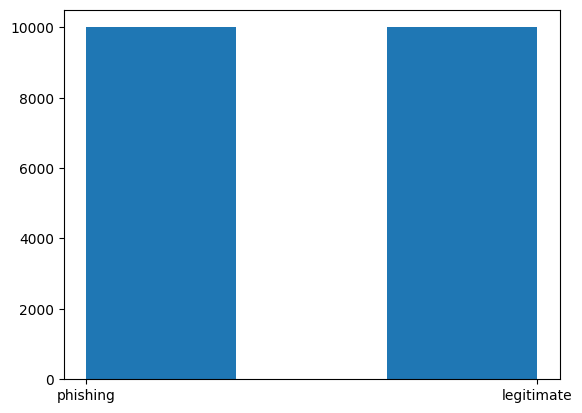

In [66]:
plt.hist(data['label'], density=False, bins= 3 )
data['label'].value_counts()

# add colors ???

## Label Encoding / Factorizing

In [67]:
# WHY DONT WE USE GETDUMMIES ???
# OR OneHotEncoder from SKLEARN

In [68]:
# 0 is for legitimate url, 1 for phishing websites
data['label'] = pd.factorize(data['label'])[0] #what is the use of [0]??

data

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
0,0,0.240038,False,4.203093,False,0.039216,0.809697,0,-0.439489,0,False,2,0.606254,False
1,0,0.494011,False,4.747960,False,0.634146,0.359965,0,2.489462,0,False,2,0.438186,False
2,0,0.240038,False,4.453623,False,0.040000,0.809697,0,0.146301,1,False,1,0.606254,True
3,0,-0.327666,False,3.970176,False,0.000000,-0.539498,0,-0.439489,0,False,0,0.680827,False
4,0,0.344615,False,4.548398,False,0.441860,-0.089766,0,-0.439489,0,True,1,0.474778,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,-0.506941,False,3.251629,False,0.000000,-0.539498,0,-0.439489,0,False,0,0.298747,False
19996,1,-0.506941,False,3.418296,False,0.000000,-0.089766,0,-0.439489,0,False,0,0.430827,False
19997,1,-0.551760,False,2.947703,False,0.000000,-0.539498,0,-0.439489,0,False,0,0.352214,False
19998,1,-0.252968,False,3.974890,False,0.181818,-0.089766,0,0.146301,0,False,1,0.266068,False


## Assign IV and TV

In [69]:
X = data.drop('label', axis = 1) #IV
Y = data['label'] #TV

## Data Split / Model Building

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [71]:
X_test.head(5)
# or X_train[0:5]

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
11456,-0.357545,False,3.879664,False,0.0,-0.089766,0,-0.439489,0,False,1,0.314494,False
16528,-0.536820,False,3.121928,False,0.0,-0.539498,0,-0.439489,0,False,0,0.332193,False
3253,-0.252968,False,4.349192,False,0.0,-0.539498,0,0.146301,0,False,0,0.601101,False
18614,-0.551760,False,2.947703,False,0.0,-0.539498,0,-0.439489,0,False,0,0.352214,False
1544,-0.342606,False,3.414441,False,0.0,-0.539498,0,-0.439489,0,False,0,0.699750,False


In [72]:
#Y_test.head()
Y_train.value_counts()

label
1    8045
0    7955
Name: count, dtype: int64

In [73]:
Y_test.shape # 0.2 of the data set

(4000,)

## KNN

In [74]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [75]:
# ATTANTION CECI EST UN ENORME COPIER COLLER IL SAGIRAI DE COMPRENDRE POUR JUGER CE SCRIPT

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print("KNN - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(Y_test, y_pred))

KNN - Accuracy: 99.650.

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2045
           1       1.00      0.99      1.00      1955

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### ANALYSE THE RESULTS : 
PLEASE DO SO

## Confusion Matrix

In [76]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[2042    3]
 [  11 1944]]


Text(0.5, 1.0, 'Confusion Matrix')

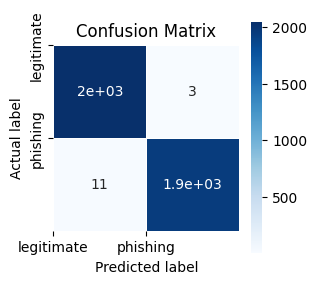

In [77]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues')

plt.xticks([0, 1], ['legitimate', 'phishing'])
plt.yticks([0, 1], ['legitimate', 'phishing'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')



plt.title("Confusion Matrix", size = 12)

### Model building with Tensorflow

In [78]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input

Create model with 1 input layer, 2 hidden layer and 1 output layer

In [79]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],))) # input layer
model.add(Dense(40,activation='relu')) # hidden layer
model.add(Dense(20,activation='relu')) # hidden layer
model.add(Dense(1,activation='sigmoid')) # output layer

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 40)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [82]:
X_train_arr = X_train.to_numpy()
Y_train_arr = Y_train.to_numpy()
print(type(X_train_arr), type(Y_train_arr))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [83]:
print("X_train shape:", X_train_arr.shape)
print("Y_train shape:", Y_train_arr.shape)

X_train shape: (16000, 13)
Y_train shape: (16000,)


In [84]:
X_test_arr = X_test.to_numpy()
Y_test_arr = Y_test.to_numpy()
print("X_test shape:", X_test_arr.shape)
print("Y_test shape:", Y_test_arr.shape)


X_test shape: (4000, 13)
Y_test shape: (4000,)


In [85]:
# Convert to tensor
X_train_tsr = tf.convert_to_tensor(X_train_arr, dtype=tf.float32)
Y_train_tsr = tf.convert_to_tensor(Y_train_arr, dtype=tf.float32)
X_test_tsr = tf.convert_to_tensor(X_test_arr, dtype=tf.float32)
Y_test_tsr = tf.convert_to_tensor(Y_test_arr, dtype=tf.float32)

#### Model Training

In [86]:
#history = model.fit(X_train_tsr,Y_train_tsr,epochs=120,validation_split=0.2,batch_size=40) => 21.6sec => 0 + 0

#history = model.fit(X_train_tsr,Y_train_tsr,epochs=120,validation_split=0.99,batch_size=40) => 17.5sec => 21 + 25
#history = model.fit(X_train_tsr,Y_train_tsr,epochs=120,validation_split=0.01,batch_size=40) => 21.2sec => 0 + 0
#history = model.fit(X_train_tsr,Y_train_tsr,epochs=120,validation_split=0.999,batch_size=40) => 17.9sec => 0 + 1.1e+3
history = model.fit(X_train_tsr,Y_train_tsr,epochs=120,validation_split=0.2,batch_size=40)


Epoch 1/120


320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.7762 - loss: 0.4891 - val_accuracy: 0.9953 - val_loss: 0.0573
Epoch 2/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9965 - loss: 0.0414 - val_accuracy: 0.9981 - val_loss: 0.0131
Epoch 3/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.9981 - loss: 0.0133 - val_accuracy: 0.9991 - val_loss: 0.0059
Epoch 4/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9995 - loss: 0.0054 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 5/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 6/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 8/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9998 - loss: 0.0016 - val_

In [87]:
results = model.evaluate(X_test_tsr, Y_test_tsr, batch_size=128)
print("test loss, test acc:", results)

print("Generate predictions for 3 samples")
predictions = model.predict(X_test_tsr[:3])
print("predictions shape:", predictions.shape)
print(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 1.0000 - loss: 1.7059e-09
test loss, test acc: [1.532069582310669e-09, 1.0]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predictions shape: (3, 1)
[[1.000000e+00]
 [1.000000e+00]
 [4.087049e-12]]


In [88]:
print("Predictions :")
for prediction in predictions:
    if prediction > 0.5:
        print("Phishing")
    else:
        print("Legitimate")
        
print("Real values :")
for value in Y_test_tsr[:3]:
    if value == 1:
        print("Phishing")
    else:
        print("Legitimate")

Predictions :
Phishing
Phishing
Legitimate
Real values :
Phishing
Phishing
Legitimate


In [89]:
y_pred = model.predict(X_test_tsr)
#Converting predictions to 1D array
y_pred = np.array([1 if x > 0.5 else 0 for x in y_pred])

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


In [90]:
cm2 = confusion_matrix(Y_test, y_pred)
print(cm2)

[[2045    0]
 [   0 1955]]


Text(0.5, 1.0, 'Confusion Matrix')

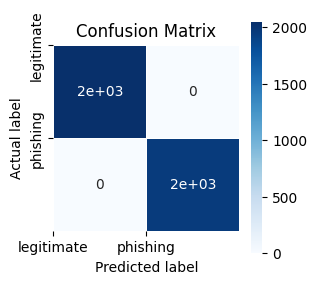

In [91]:
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True, linewidths=.5, square = True, cmap = 'Blues')

plt.xticks([0, 1], ['legitimate', 'phishing'])
plt.yticks([0, 1], ['legitimate', 'phishing'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')



plt.title("Confusion Matrix", size = 12)